In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
from sklearn import metrics

In [13]:
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
Diamonds.head()

carat        cut color clarity  depth  table  price     x     y     z
11202   1.09  Very Good     I     VS2   62.0   56.0   4959  6.57  6.59  4.08
15583   1.20    Premium     F     SI1   62.4   58.0   6250  6.81  6.75  4.23
20137   1.20      Ideal     G     VS1   62.4   57.0   8596  6.74  6.82  4.23
10066   0.32  Very Good     H     SI1   63.5   57.0    591  4.39  4.34  2.77
30614   0.34  Very Good     F     SI2   61.7   61.0    447  4.44  4.48  2.75

In [28]:
Diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 11202 to 34626
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [29]:
Diamonds['carat'].min()

0.2

In [31]:
Diamonds['carat'].max()

5.01

In [32]:
Diamonds['cut'].unique()

['Very Good', 'Premium', 'Ideal', 'Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [33]:
Diamonds['color'].unique

<bound method Series.unique of 11202    I
15583    F
20137    G
10066    H
30614    F
        ..
15338    F
37385    F
38175    F
23814    D
34626    E
Name: color, Length: 53940, dtype: category
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']>

In [34]:
Diamonds['clarity'].unique()

['VS2', 'SI1', 'VS1', 'SI2', 'IF', 'VVS2', 'VVS1', 'I1']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [37]:
color_Data={'D':1,'E':2,'F':3,'F':4,'G':5,'H':6,'I':7,'J':8}
cut_Data={'Ideal':1,'Premium':2,'Very Good':3,'Good':4,'Fair':4}
clarity_Data={'IF':1,'VVS1':2,'VVS2':3,'VS1':4,'VS2':5,'SI1':6,'SI2':7,'I1':8}

In [38]:
Diamonds['color']=Diamonds['color'].map(color_Data)
Diamonds['cut']=Diamonds['cut'].map(cut_Data)
Diamonds['clarity']=Diamonds['clarity'].map(clarity_Data)

In [40]:
Diamonds.head(11)

carat  cut color clarity  depth  table  price     x     y     z
11202   1.09    3     7       5   62.0   56.0   4959  6.57  6.59  4.08
15583   1.20    2     4       6   62.4   58.0   6250  6.81  6.75  4.23
20137   1.20    1     5       4   62.4   57.0   8596  6.74  6.82  4.23
10066   0.32    3     6       6   63.5   57.0    591  4.39  4.34  2.77
30614   0.34    3     4       7   61.7   61.0    447  4.44  4.48  2.75
40791   0.31    1     4       1   61.2   57.0   1168  4.35  4.38  2.67
26957   1.67    3     5       3   61.6   57.0  17028  7.61  7.69  4.71
44552   0.55    1     5       6   61.7   55.0   1605  5.25  5.28  3.25
53664   0.72    4     5       5   63.1   57.0   2708  5.71  5.74  3.61
3677    0.70    4     4       3   62.5   58.0   3445  5.68  5.75  3.57
34357   0.30    3     5       1   62.6   56.0    863  4.27  4.29  2.68

In [41]:
#now we can define X and Y variable with machine learning

In [42]:
x=Diamonds[['carat','cut','color','clarity']]
y=Diamonds['price']

In [47]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = .4, random_state=101)

In [49]:
print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape)

(32364, 4) (32364,)
(21576, 4) (21576,)


In [50]:
#Linear Regression

In [55]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [57]:
#our linear regression is done we are going to predict 

In [58]:
predictions = lm.predict(x_test)
predictions

array([10130.20264407,  5001.99154185,  5256.38997565, ...,
        2824.33459246,  4665.47193816,  1682.95679166])

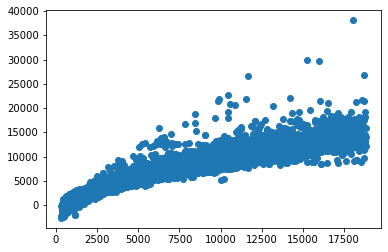

In [59]:
plt.scatter(y_test, predictions)

In [60]:
#test accuracy score

In [61]:
print('Score:',lm.score(x_test, y_test))

Score: 0.9009667036933303


In [ ]:
#testing the average amount of error between the prediction and real data

In [62]:
metrics.mean_absolute_error(y_test, predictions)

865.3834131869871

In [63]:
#the mean squared 

In [64]:
metrics.mean_squared_error(y_test, predictions)

1581937.6415673455

In [65]:
#Root mean squared error (rmse)

In [66]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1257.7510252698446

In [67]:
#K-Folds cross validation

In [68]:
kfold = KFold(n_splits = 3, shuffle=True, random_state=1)
for train, test in kfold.split(x,y):
     print('train: %s, test: %s' % (train,test))

train: [    0     1     4 ... 53937 53938 53939], test: [    2     3     8 ... 53932 53934 53935]
train: [    1     2     3 ... 53935 53938 53939], test: [    0     4     6 ... 53933 53936 53937]
train: [    0     2     3 ... 53935 53936 53937], test: [    1     5     9 ... 53931 53938 53939]


In [69]:
print(cross_val_score(lm, x,y, cv=3))

[0.89982362 0.90563838 0.90103977]
